In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('D:/Data Science/Assignment/14Decision Tree/Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


There is no Null Value but need to remove the dots in column names

In [5]:
#Rename the column name
data.rename(columns={'Taxable.Income':'Taxable_Income','Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [10]:
data['Status']=(data['Taxable_Income']<=30000)
d={False:'good',True:'Risky'}
data['Status']=(data['Status'].map(d))
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [14]:
le= LabelEncoder()

In [15]:
#encoding data 
data['Undergrad']=le.fit_transform(data['Undergrad'])
data['Marital_Status']=le.fit_transform(data['Marital_Status'])
data['Urban']=le.fit_transform(data['Urban'])

In [16]:
data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Status
0,0,2,68833,50047,10,1,good
1,1,0,33700,134075,18,1,good
2,0,1,36925,160205,30,1,good
3,1,2,50190,193264,15,1,good
4,0,1,81002,27533,28,0,good


In [17]:
x=data.drop('Status',axis=1)
y=data['Status']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [19]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [21]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
y_pred=model.predict(x_test)

In [23]:
pd.crosstab(y_pred,y_test)

Status,Risky,good
row_0,,
Risky,25,0
good,0,95


In [24]:
np.mean(y_pred==y_test)

1.0

## Plot Tree

[Text(167.4, 163.07999999999998, 'X[2] <= 30055.5\nentropy = 0.734\nsamples = 480\nvalue = [99, 381]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 381\nvalue = [0, 381]')]

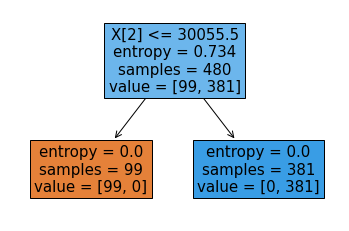

In [25]:
tree.plot_tree(model,fontsize=15,filled=True)

## Gini Index

In [26]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [27]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
y_predict=model_gini.predict(x_test)

In [29]:
np.mean(y_test==y_predict)

1.0

In [30]:
pd.crosstab(y_predict,y_test)

Status,Risky,good
row_0,,
Risky,25,0
good,0,95
